In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 0) 

In [2]:
def anomaly_report(df, romi_threshold=2.0, spend_threshold=1000.0):
    
    high_romi = df[df['romi'] > romi_threshold].sort_values(by='romi', ascending=False)
    high_spend = df[df['total_spend'] > spend_threshold].sort_values(by='total_spend', ascending=False)
    zero_clicks = df[df['total_clicks'] == 0].sort_values(by='ad_date')
    zero_impressions = df[df['total_impressions'] == 0].sort_values(by='ad_date')

    return {
        'high_romi': high_romi[['ad_date', 'campaign_name', 'romi', 'total_spend']],
        'high_spend': high_spend[['ad_date', 'campaign_name', 'total_spend', 'romi']],
        'zero_clicks': zero_clicks[['ad_date', 'campaign_name', 'total_clicks', 'total_impressions', 'romi']],
        'zero_impressions': zero_impressions[['ad_date', 'campaign_name', 'total_impressions', 'romi']]
    }

# Analytics Report on Facebook Advertising Campaigns

In [3]:
data_init= pd.read_csv('C:/Users/yarem/Downloads/facebook_ads_data.csv')
data_init.head(10)

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
5,2022-10-28,Expansion,630.33,5522,121,590.00,5.21,114.15,0.021912,0.936018
6,2022-10-27,Expansion,359.63,45223,87,376.69,4.13,7.95,0.001924,1.047438
7,2022-07-11,Expansion,33.02,2674,40,47.02,0.83,12.35,0.014959,1.423985
8,2022-07-10,Expansion,234.34,11266,74,254.62,3.17,20.80,0.006568,1.086541
9,2022-07-09,Expansion,461.70,25300,53,355.11,8.71,18.25,0.002095,0.769136


In [4]:
data_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [5]:
data_init.describe(include='all')

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
count,1494,1494,1494.000000,1494.000000,1494.000000,1494.000000,1443.000000,1462.000000,1462.000000,1462.000000
unique,547,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-08-06,Lookalike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,131.035964,34190.182062,318.840696,165.457450,0.814712,5.085677,0.011947,1.326322
std,NaN,NaN,214.968986,44433.507387,485.663099,274.764573,1.705224,8.107076,0.013192,0.343012
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.751445
25%,NaN,NaN,18.047500,8377.000000,62.250000,24.350000,0.170000,1.500000,0.004462,1.067832
50%,NaN,NaN,48.515000,15983.000000,148.000000,65.460000,0.350000,2.775000,0.007845,1.299482
75%,NaN,NaN,161.790000,45849.750000,371.750000,196.595000,0.765000,5.275000,0.015005,1.527423


In [6]:
info_df = pd.DataFrame({
    'Column': data_init.columns,
    'Data Type': data_init.dtypes.values,
    'Non-Null Count': data_init.notnull().sum().values,
    'Null Count': data_init.isnull().sum().values,
    'Unique Values': [data_init[col].nunique() for col in data_init.columns],
    'Sample Value': [data_init[col].dropna().iloc[0] if data_init[col].dropna().any() else None for col in data_init.columns]
})

info_df

,Column,Data Type,Non-Null Count,Null Count,Unique Values,Sample Value
0,ad_date,object,1494,0,547,2022-11-05
1,campaign_name,object,1494,0,11,Expansion
2,total_spend,float64,1494,0,1417,0.0
3,total_impressions,int64,1494,0,1442,0
4,total_clicks,int64,1494,0,626,0
5,total_value,float64,1494,0,1412,0.0
6,cpc,float64,1443,51,273,3.92
7,cpm,float64,1462,32,753,37.57
8,ctr,float64,1462,32,1444,0.00958
9,romi,float64,1462,32,1461,0.84357


## Загальна інформація про дані
- Кількість рядків: 1494
- Кількість стовпців: 10
- Період:  
  Початкова дата: 2020-11-11  
  Кінцева дата: 2022-11-05 
- Кількість унікальних кампаній: 11
- Типи даних: числові (float, int), категоріальні (object)  
**Висновки:**
Дані охоплюють 11 рекламних кампаній.
Є пропущені значення у метриках cpc, cpm, ctr, romi.

## General Data Overview
- Number of rows: 1,494
- Number of columns: 10
- Period:  
Start date: 2020-11-11  
End date: 2022-11-05  
- Number of unique campaigns: 11
- Data types: numerical (float, int), categorical (object)  
**Conclusions:**
The dataset covers 11 advertising campaigns. There are missing values in the following metrics: CPC, CPM, CTR, and ROMI.

In [7]:
data=data_init.copy()

In [8]:
data['ad_date'] = pd.to_datetime(data['ad_date'], errors='coerce')

In [9]:
anomalies = anomaly_report(data)
anomalies['high_romi'].head()

,ad_date,campaign_name,romi,total_spend
256,2022-01-11,Trendy,2.486911,11.46
260,2022-01-07,Trendy,2.456589,28.91
229,2022-02-13,Trendy,2.418730,37.16
922,2021-07-28,Promos,2.407083,27.39
251,2022-01-16,Trendy,2.397892,35.11


In [10]:
anomalies['high_spend'].head() 

,ad_date,campaign_name,total_spend,romi
182,2022-04-09,Expansion,2035.49,1.198679
166,2022-04-17,Expansion,1833.90,1.397350
174,2022-04-13,Expansion,1623.12,1.155367
184,2022-04-08,Expansion,1609.16,1.129869
170,2022-04-15,Expansion,1581.62,0.987582


**Дні з дуже великим ROMI або витратами**  
- Надзвичайно високі значення ROMI можуть свідчити про вдалий креатив або офер (добре) чи технічну помилку.
- Великі витрати без відповідного ROMI можуть означати неправильне налаштування кампаній чи витрати "згоріли" без результату.  
📌 **Питання до перевірки:**
- Чи це одноразовий пік, чи регулярне явище?
- Чи був у цей день запуск нової кампанії?
- Чи коректно працювали трекінгові пікселі/аналітика?

**Days with Extremely High ROMI or Spend**
- Exceptionally high ROMI values may indicate a highly effective creative or offer (positive) — or a potential tracking/data error.
- Large spend without a corresponding ROMI increase could point to misconfigured campaigns or inefficient spend with little return.  
📌 **Key Questions to Investigate:**
- Was this a one-time spike or part of a recurring trend?
- Was a new campaign launched on this day?
- Were tracking pixels/analytics tools functioning correctly?

In [11]:
anomalies['zero_clicks'].head()

,ad_date,campaign_name,total_clicks,total_impressions,romi
1442,2020-12-31,Discounts,0,0,NaN
1440,2021-01-01,Discounts,0,0,NaN
1439,2021-01-01,Brand,0,353,1.512821
1434,2021-01-06,Brand,0,121,1.000000
1432,2021-01-07,Brand,0,2742,1.554098


In [12]:
anomalies['zero_impressions'].head()

,ad_date,campaign_name,total_impressions,romi
1442,2020-12-31,Discounts,0,NaN
1440,2021-01-01,Discounts,0,NaN
1365,2021-02-27,Discounts,0,NaN
1364,2021-02-28,Discounts,0,NaN
849,2021-08-09,New items,0,NaN


**Кампанії з нульовими кліками або показами**
- Нуль показів (total_impressions = 0): кампанія не запустилася, можливо, через помилку в таргетингу, бюджеті, статусі.
- Нуль кліків (total_clicks = 0) при наявних показах: проблема в креативі, релевантності, або неправильне розміщення.  
📌 **Питання до перевірки:**
- Чи була активною кампанія в цей період?
- Чи був візуал/текст привабливим?
- Чи були налаштування таргетингу/аукціону надто вузькими?

**Campaigns with Zero Clicks or Impressions**
- Zero impressions (total_impressions = 0): The campaign likely did not run at all — possible causes include targeting errors, budget restrictions, or campaign status issues.
- Zero clicks (total_clicks = 0) despite impressions: This indicates potential issues with the creative, ad relevance, or placement strategy.  
📌 **Key Questions to Investigate:**  
- Was the campaign active during this period?
- Were the visuals/text appealing and aligned with the audience?
- Were the targeting settings or auction parameters too narrow to be effective?

In [13]:
data_2021 = data[data['ad_date'].dt.year == 2021] 

## Facebook Ad Campaign Data Grouped by Date

In [14]:
daily_grouped_2021 = data_2021.groupby(data_2021['ad_date'].dt.date).sum(numeric_only=True).reset_index()
daily_grouped_2021.head(10)

,ad_date,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2021-01-01,0.39,353,0,0.59,0.00,1.10,0.000000,1.512821
1,2021-01-02,7.74,10709,205,6.90,0.04,0.72,0.019143,0.891473
2,2021-01-04,70.06,22440,1256,68.47,0.06,3.12,0.055971,0.977305
3,2021-01-05,81.15,60232,1379,61.68,0.06,1.35,0.022895,0.760074
4,2021-01-06,142.77,65265,431,145.97,0.33,2.77,0.006616,2.022425
5,2021-01-07,119.42,55885,1480,182.94,0.08,3.30,0.027849,3.085421
6,2021-01-08,61.97,33553,2641,85.03,0.50,2.78,0.083107,2.818839
7,2021-01-09,53.63,47079,708,40.94,0.08,1.14,0.015039,0.763379
8,2021-01-10,16.80,15045,679,15.86,0.02,1.12,0.045131,0.944048
9,2021-01-11,28.46,18584,650,32.44,0.04,1.53,0.034976,1.139845


In [15]:
daily_grouped_2021['ad_date'] = pd.to_datetime(daily_grouped_2021['ad_date'], errors='coerce')

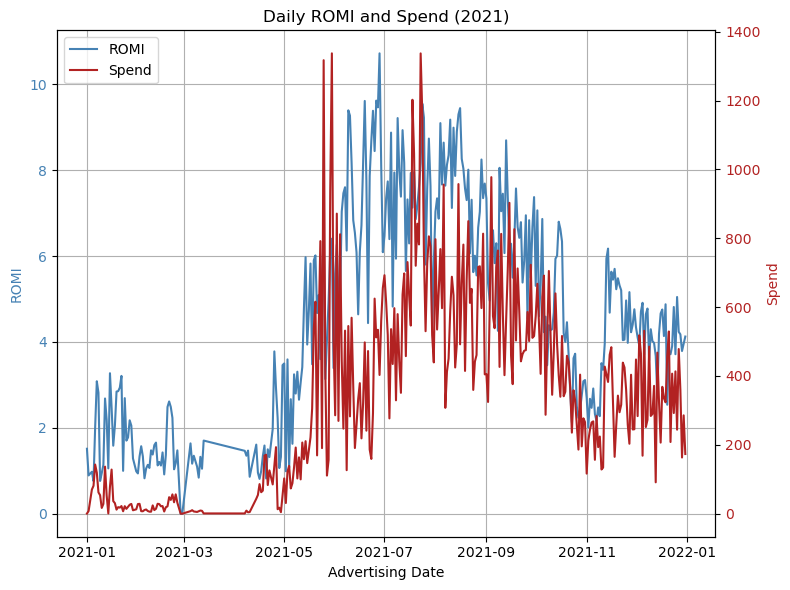

In [16]:
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=100)

# ROMI 
romi_line = sns.lineplot(x='ad_date', y='romi', data=daily_grouped_2021, color='steelblue', ax=ax1
)
ax1.set_xlabel('Advertising Date')
ax1.set_ylabel('ROMI', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.grid(True)

# Spend
ax2 = ax1.twinx()
spend_line = sns.lineplot(x='ad_date', y='total_spend', data=daily_grouped_2021, color='firebrick', ax=ax2
)
ax2.set_ylabel('Spend', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

#  legend
lines = romi_line.lines + spend_line.lines
labels = ['ROMI', 'Spend']
ax1.legend(lines, labels, loc='upper left')

plt.title('Daily ROMI and Spend (2021)')
fig.tight_layout()
plt.show()

Графік відображає щоденне значення повернення інвестицій у маркетинг (ROMI) та рекламні витрати протягом 2021 року. 
Періоди активності:  
- Січень — Квітень:  
Витрати досить низькі або майже відсутні.
ROMI варіюється, але загалом теж нестабільний і низький.  
- Травень — Вересень:  
Спостерігається різке зростання витрат — пікові значення до 1300+.
Водночас ROMI також збільшується, подекуди вище 10.
Це найуспішніший період кампаній, коли збільшення бюджету має найкращий результат.
Після пікових значень ROMI поступово знижується, попри високі витрати — що може свідчити про насичення аудиторії або зниження ефективності.  
- Жовтень — Грудень:  
Витрати зменшуються.
ROMI коливається в межах 2–6, іноді різко падає.
Це може бути результатом зниження попиту, конкуренції або змін у креативах/таргетингу.  

### Ключові спостереження:  
- ROMI не завжди прямо пропорційний витратам. Найвищий ROMI не завжди співпадає з максимальними витравтами.  
- Збільшення бюджету влітку (травень–липень) дає позитивний ефект, але після певного моменту ROMI знижується.  
- У другій половині року ефективність знижується, незважаючи на ще суттєві витрати, що вказує на зниження маржинальності інвестицій.

The chart shows the daily Return on Marketing Investment (ROMI) and advertising spend over the year 2021.  
Activity Periods:  
- January – April:  
Spending is quite low or almost nonexistent.
ROMI fluctuates but is generally unstable and low.  
- May – September:  
A sharp increase in spend is observed — peak values reach over 1300.
At the same time, ROMI also increases, sometimes exceeding 10.
This is the most successful period of the campaigns, where increased budget produced the best results.
After the peak values, ROMI gradually decreases despite continued high spending — which may indicate audience saturation or declining effectiveness.  
- October – December:  
Spending decreases.
ROMI fluctuates between 2–6, occasionally dropping sharply.
This may be the result of decreased demand, increased competition, or changes in creatives/targeting.

### Key Observations:  
- ROMI is not always directly proportional to spending. The highest ROMI does not necessarily coincide with the highest spend.  
- Increased budget allocation during the summer months (May–July) yields a positive effect, but after a certain point, ROMI begins to decline.  
- In the second half of the year, efficiency decreases despite continued substantial spending, indicating a decline in the marginal return on investment.  

In [17]:
daily_grouped_2021['romi_rolling'] = daily_grouped_2021['romi'].rolling(window=7).mean()
daily_grouped_2021['spend_rolling'] = daily_grouped_2021['total_spend'].rolling(window=7).mean()
daily_grouped_2021.head(10)

,ad_date,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi,romi_rolling,spend_rolling
0,2021-01-01,0.39,353,0,0.59,0.00,1.10,0.000000,1.512821,NaN,NaN
1,2021-01-02,7.74,10709,205,6.90,0.04,0.72,0.019143,0.891473,NaN,NaN
2,2021-01-04,70.06,22440,1256,68.47,0.06,3.12,0.055971,0.977305,NaN,NaN
3,2021-01-05,81.15,60232,1379,61.68,0.06,1.35,0.022895,0.760074,NaN,NaN
4,2021-01-06,142.77,65265,431,145.97,0.33,2.77,0.006616,2.022425,NaN,NaN
5,2021-01-07,119.42,55885,1480,182.94,0.08,3.30,0.027849,3.085421,NaN,NaN
6,2021-01-08,61.97,33553,2641,85.03,0.50,2.78,0.083107,2.818839,1.724051,69.071429
7,2021-01-09,53.63,47079,708,40.94,0.08,1.14,0.015039,0.763379,1.616988,76.677143
8,2021-01-10,16.80,15045,679,15.86,0.02,1.12,0.045131,0.944048,1.624499,77.971429
9,2021-01-11,28.46,18584,650,32.44,0.04,1.53,0.034976,1.139845,1.647719,72.028571


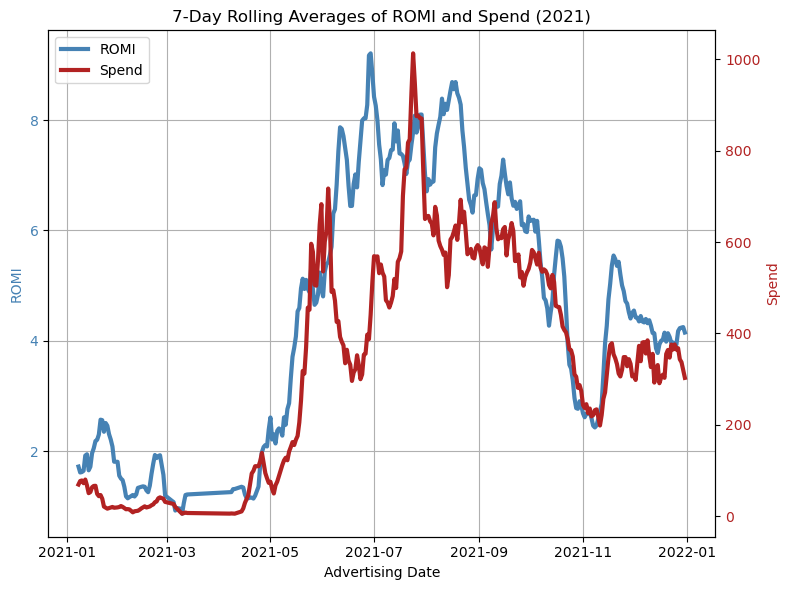

In [18]:
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=100)

# ROMI 
romi_line = sns.lineplot(x='ad_date', y='romi_rolling', data=daily_grouped_2021, color='steelblue', linewidth=3, ax=ax1
)
ax1.set_xlabel('Advertising Date')
ax1.set_ylabel('ROMI', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.grid(True)

# Spend
ax2 = ax1.twinx()
spend_line = sns.lineplot(x='ad_date', y='spend_rolling', data=daily_grouped_2021, color='firebrick', linewidth=3, ax=ax2
)
ax2.set_ylabel('Spend', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

#  legend
lines = romi_line.lines + spend_line.lines
labels = ['ROMI', 'Spend']
ax1.legend(lines, labels, loc='upper left')

plt.title('7-Day Rolling Averages of ROMI and Spend (2021)')
fig.tight_layout()
plt.show()

Графік відображає 7-денні ковзні середні значення повернення інвестицій у маркетинг (ROMI) та рекламних витрат протягом 2021 року.  
Rolling average добре згладжує шум і дозволяє краще побачити тренди, ніж raw-дані.
Пік ефективності (червень–липень) був короткочасним, і подальше зниження ROMI не компенсувалося меншими витратами.
У другій половині року витрати ще були помітними, але ROMI знизився — можливо, без адаптації кампаній.
У листопаді, ймовірно, було масове вимкнення або призупинення реклами.

The chart displays the 7-day rolling averages of Return on Marketing Investment (ROMI) and advertising spend over 2021.  
The rolling average effectively smooths out noise and provides a clearer view of trends compared to raw data.
The peak in efficiency (June–July) was short-lived, and the subsequent decline in ROMI was not offset by reduced spending.  
In the second half of the year, spending remained significant, but ROMI declined — possibly due to a lack of campaign adaptation.  
In November, there was likely a major shutdown or pause in advertising.

## Facebook Ad Campaign Data Grouped by campaign name	

In [19]:
campaign_grouped = data.groupby('campaign_name').agg({'total_spend': 'sum','romi': 'sum'}).reset_index()
campaign_grouped

,campaign_name,total_spend,romi
0,Brand,539.92,124.129263
1,Crazy discounts,2175.29,149.897575
2,Discounts,2856.39,120.969760
3,Electronics,23920.42,208.296664
4,Expansion,67212.82,141.125258
5,Hobbies,11326.97,121.418808
6,Lookalike,63631.09,288.853058
7,New items,2936.97,124.076123
8,Promos,4993.84,248.774371
9,Trendy,1992.31,167.453207


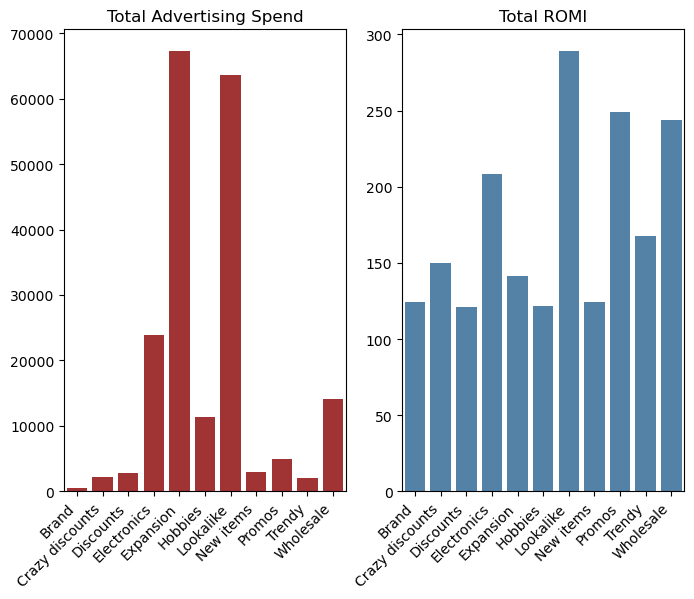

In [20]:
plt.figure(figsize=(8, 6), dpi=100)

# Total Spend
plt.subplot(1, 2, 1)
# plt.bar(campaign_grouped['campaign_name'], campaign_grouped['total_spend'], color='blue')
sns.barplot(data=campaign_grouped, x='campaign_name', y='total_spend', color='firebrick')
plt.title('Total Advertising Spend')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

# ROMI
plt.subplot(1, 2, 2)
# plt.bar(campaign_grouped['campaign_name'], campaign_grouped['romi'], color='orange')
sns.barplot(data=campaign_grouped, x='campaign_name', y='romi', color='steelblue')
plt.title('Total ROMI')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

plt.show()

### Ключові спостереження:  
- Графіки відображають «Загальні витрати на рекламу» та «Загальний ROMI» для різних рекламних кампаній у Facebook.
- Lookalike і Hobbies: кампанії з найвищими витратами (понад 60 000).  
Вони також мають високі ROMI (особливо Lookalike — майже 290), що свідчить про хорошу ефективність вкладених коштів.  
- Expansion також має суттєві витрати (24 000) і демонструє високий рівень ROMI (210).  
- New items:  
Незважаючи на помірні витрати (12 000), має низький ROMI (130) — ефективність сумнівна, можливо, потребує оптимізації або переосмислення.  
- Promos та Trendy:  
Витрати незначні (5 000), але ROMI досить високий (250 і 170 відповідно), тобто кампанії є економними та ефективними.  
- Wholesale:  
Помірний бюджет (15 000) при високому ROMI (245) — відмінний результат, показує сильний потенціал для масштабування.  
- Crazy Discounts і Discounts:  
Витрати малі (2 000), ROMI також невисокий (120–150). Можливо, ці кампанії були короткостроковими або менш ефективними.

### Key Observations:  
- The charts display the "Total Advertising Spend" and "Total ROMI" across various Facebook Advertising Campaigns.
- Lookalike and Hobbies:  
These campaigns had the highest spend (over 60,000).
They also achieved high ROMI (especially Lookalike — nearly 290), indicating excellent efficiency and return on investment.  
- Expansion:  
Significant spend (24,000) with a strong ROMI of around 210 — showing great performance.  
- New Items:  
Despite moderate spend (12,000), the ROMI is relatively low (130) — suggesting questionable efficiency. This campaign may need optimization or a strategic rethink.    
- Promos and Trendy:  
Low budgets (around 5,000), but high ROMI (250 and 170 respectively). These campaigns are lean and highly efficient.  
- Wholesale:  
Moderate spend (15,000) with a high ROMI (245) — an excellent result that shows strong potential for scaling.  
- Crazy Discounts and Discounts:  
Very low spend (around 2,000), and ROMI is also low (120–150). These may have been short-term or underperforming campaigns.

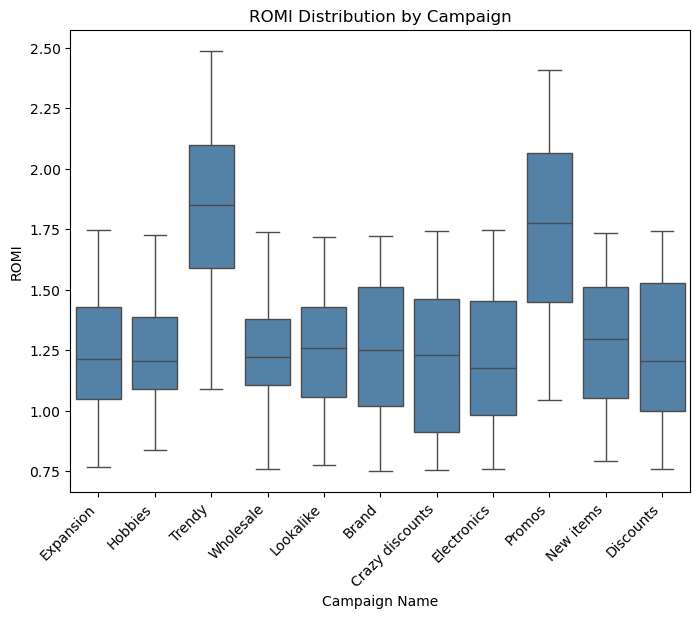

In [21]:
plt.figure(figsize=(8, 6), dpi=100)
sns.boxplot(x='campaign_name', y='romi', data=data, color='steelblue')
plt.title('ROMI Distribution by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.xticks(rotation=45, ha='right')

plt.show()

### Ключові спостереження:
- Графік є діаграмою box plot (ящик з вусами), що відображає розподіл показників повернення інвестицій у маркетинг (ROMI) для різних рекламних кампаній у Facebook.
- Кампанія Trendy демонструє найвищий потенціал ROMI: має найвищу медіану ROMI (близько 1.85), а також найвищий верхній квартиль та максимальні значення, досягаючи майже 2.5. Це свідчить про те, що коли кампанія ефективна і  забезпечує високі прибутки.  
- Promos також досить ефективна: показує високу ефективність, з медіаною ROMI, схожою на Trendy (близько 1.75), та високим верхнім діапазоном.  
- Crazy Discounts має найнижчий ROMI: Цей тип кампанії послідовно показує найнижчий ROMI, з медіаною нижче 1.25 і вузьким розподілом, що вказує на меншу варіативність і загалом нижчі прибутки.  
- Середні показники: Expansion, Hobbies, Wholesale, Lookalike, Brand, Electronics, New items та Discounts знаходяться в середньому діапазоні ROMI, з медіанами, як між 1.1 і 1.4.  
- Варіативність між кампаніями:  
Trendy та Promos показують більші розкиди, що вказує на більшу варіативність у їхній ефективності ROMI. Це означає, що хоча вони можуть досягти високих прибутків, їхні результати також можуть значно відрізнятися.  
Crazy discounts показує дуже вузький розподіл, що означає, що її ROMI постійно низький.  
Інші кампанії, такі як Expansion, Hobbies, Brand та Electronics, також показують відносно обмежені розподіли.

### Key Observations:  
- The chart is a box plot showing the distribution of Return on Marketing Investment (ROMI) values across various Facebook Advertising Campaigns.
- The Trendy campaign demonstrates the highest ROMI potential: it has the highest median ROMI (around 1.85), as well as the highest upper quartile and maximum values, reaching nearly 2.5. This indicates that when the campaign is effective, it generates substantial profits.
- Promos is also quite effective: it shows strong performance with a median ROMI similar to Trendy (around 1.75) and a high upper range.
- Crazy Discounts has the lowest ROMI: This type of campaign consistently shows the lowest ROMI, with a median below 1.25 and a narrow distribution, indicating less variability and generally lower profits.
- Average performance: Campaigns like Expansion, Hobbies, Wholesale, Lookalike, Brand, Electronics, New items, and Discounts fall within the mid-range ROMI, with medians between 1.1 and 1.4.
- Variability between campaigns:  
Trendy and Promos show wider spreads, indicating greater variability in their ROMI performance. This means that while they can achieve high profits, their results can also vary significantly.  
Crazy Discounts shows a very narrow distribution, meaning its ROMI is consistently low.  
Other campaigns, such as Expansion, Hobbies, Brand, and Electronics, also display relatively limited distributions.


<Figure size 800x600 with 0 Axes>

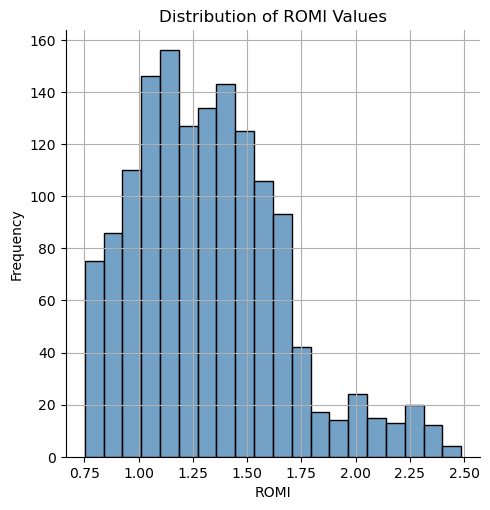

In [22]:
plt.figure(figsize=(8, 6), dpi=100)

sns.displot(data=data, x='romi', bins=20, color='steelblue', edgecolor='black')

plt.title('Distribution of ROMI Values')
plt.xlabel('ROMI')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

### Ключові спостереження:
- Графік відображає частотний розподіл показників повернення інвестицій у маркетинг (ROMI) для рекламних кампаній у Facebook.  
- Розподіл має пікову частоту в інтервалі 1.25–1.50, що свідчить про те, що більшість кампаній мають ROMI, зосереджений у цьому діапазоні.  
- Частота зменшується симетрично з обох боків піку, утворюючи приблизно дзвоноподібну форму, хоча присутнє невелике зміщення вправо (позитивна асиметрія) з довшим "хвостом" на сторону вищих ROMI що свідчить про наявність вищих значень ROMI, які, ймовірно, представляють більш успішні маркетингові ініціативи.  
- Кампаній із ROMI менше 0.75 або більше 2.25 — небагато, що вказує на рідкість екстремальних значень.  
Отже більшість Facebook-кампаній досягають помірного ROMI, з найбільшою концентрацією в межах 1.25–1.50, а дуже низькі або дуже високі результати трапляються рідше.

### Key Observations:  
- The chart shows the frequency distribution of Return on Marketing Investment (ROMI) values for Facebook advertising campaigns.
- The distribution peaks in the 1.25–1.50 range, indicating that most campaigns have ROMI values concentrated within this interval.
- Frequency decreases symmetrically on both sides of the peak, forming an approximately bell-shaped curve, though with a slight right skew (positive asymmetry) and a longer tail toward higher ROMI values — suggesting the presence of higher ROMI cases that likely represent more successful marketing initiatives.
- There are relatively few campaigns with ROMI values below 0.75 or above 2.25, indicating that extreme values are uncommon.
- Therefore, most Facebook campaigns achieve moderate ROMI, with the highest concentration between 1.25 and 1.50, while very low or very high results are less frequent.

In [23]:
numeric_data = data.select_dtypes(include='number')
data_cor=numeric_data.corr()
data_cor

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
total_spend,1.000000,0.475607,0.480066,0.978890,0.262254,0.482027,-0.025495,-0.114859
total_impressions,0.475607,1.000000,0.765489,0.472037,-0.093097,-0.121094,-0.155701,-0.099520
total_clicks,0.480066,0.765489,1.000000,0.472124,-0.159521,-0.032829,0.200440,-0.101495
total_value,0.978890,0.472037,0.472124,1.000000,0.250851,0.471338,-0.022267,-0.013733
cpc,0.262254,-0.093097,-0.159521,0.250851,1.000000,0.593732,-0.210719,-0.076911
cpm,0.482027,-0.121094,-0.032829,0.471338,0.593732,1.000000,0.116213,-0.062676
ctr,-0.025495,-0.155701,0.200440,-0.022267,-0.210719,0.116213,1.000000,-0.049992
romi,-0.114859,-0.099520,-0.101495,-0.013733,-0.076911,-0.062676,-0.049992,1.000000


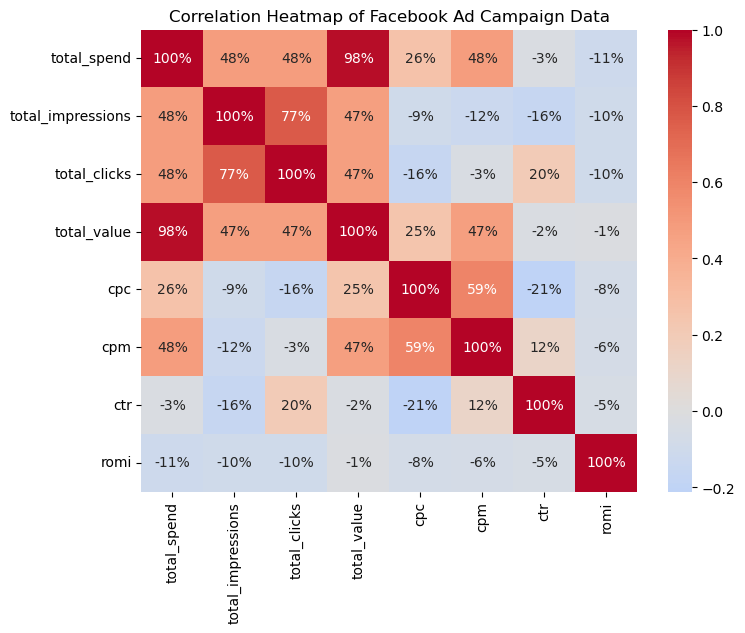

In [24]:
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(data_cor, annot=True, fmt=".0%", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Facebook Ad Campaign Data')
plt.show()

### Ключові спостереження:
- Загальний дохід (total_value) сильно корелює з загальними витратами (total_spend) (98%) і має помірну кореляцію з кількістю кліків (total_clicks) (47%) та кількістю переглядів (total_impressions) (47%).  
- romi має слабкі негативні кореляції з більшістю метрик (наприклад, -11% з total_spend, -10% з total_impressions) — це вказує на те, що ROMI не сильно залежить від обсягів витрат або охоплення.
- Найвища кореляція спостерігається між загальними витратами (total_spend) та загальним доходом (total_value) (98%) вказує на те, що витрати є основним драйвером отриманої цінності.
- Найнижча кореляція загального доходу (total_value) та показником повернення інвестицій (romi) становить -1%, що вказує на дуже слабкий негативний зв’язок. Це означає, що загальний дохід майже не впливає на рентабельність маркетингових інвестицій.  
   Отже, хоча зростання витрат призводить до збільшення показів, кліків і загальної цінності, ROMI менш залежний від цих показників і, ймовірно, формується під впливом інших факторів, які потребують окремого вивчення.

### Key Observations:  
- Total value correlates strongly with total spend (98%) and has a moderate correlation with total clicks (47%) and total impressions (47%).
- ROMI shows weak negative correlations with most metrics (e.g., -11% with total spend, -10% with total impressions) — this indicates that ROMI is not strongly dependent on the volume of spend or reach.
- The highest correlation is observed between total spend and total value (98%), indicating that spend is the primary driver of the value obtained.
- The lowest correlation between total value and Return On Marketing Investment (ROMI) is -1%, which indicates a very weak negative relationship. This means that total revenue (value) has almost no impact on the profitability of marketing investments.  
  Therefore, although an increase in spend leads to a rise in impressions, clicks, and total value, ROMI is less dependent on these metrics and is likely shaped by other factors that require separate investigation.

<Figure size 800x600 with 0 Axes>

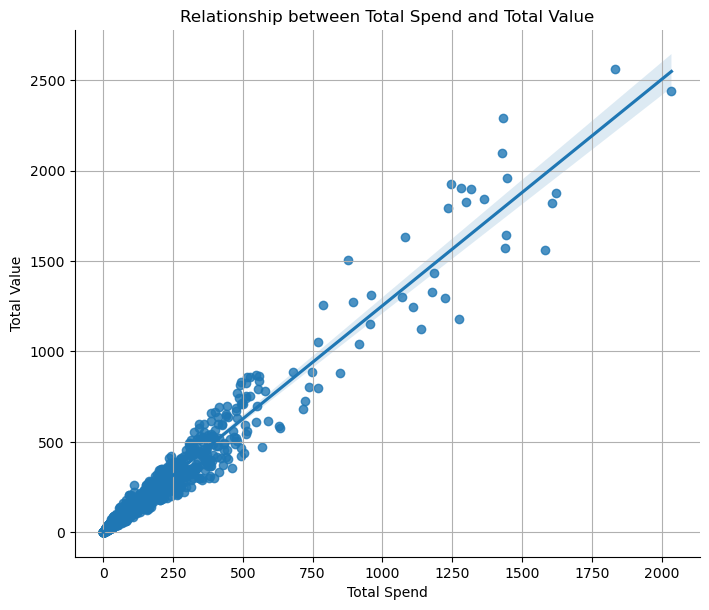

In [25]:
plt.figure(figsize=(8, 6), dpi=100)
sns.lmplot(data=data, x='total_spend', y='total_value', height=6, aspect=1.2)
plt.title('Relationship between Total Spend and Total Value')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

### Ключові спостереження:
- Діаграма розсіювання з трендовою лінією, що ілюструє кореляцію між витратами на рекламу та загальним доходом.
- Чітка лінійна залежність: Точки даних розташовані дуже близько до прямої лінії регресії, що візуально підтверджує дуже високу позитивну кореляцію (98%), яку ми бачили на тепловій карті.
- Сильна пряма пропорційність: Зі збільшенням витрат (total_spend) майже лінійно збільшується загальний дохід (total_value).
- Розсіювання: Хоча залежність сильна, є деяке розсіювання точок навколо лінії регресії, особливо при вищих значеннях витрат. Це означає, що незважаючи на загальну тенденцію, є кампанії з однаковими витратами, які принесли трохи більше або трохи менше доходу.

### Key Observations:  
- A scatter plot with a trend line, illustrating the correlation between advertising spend and total revenue.
- Clear linear relationship: The data points are located very close to the regression line, visually confirming a very high positive correlation (98%), as seen on the heatmap.
- Strong direct proportionality: As spending (total_spend) increases, the total revenue (total_value) almost linearly increases.
- Scatter: Although the relationship is strong, there is some scatter of points around the regression line, especially at higher spend levels. This indicates that despite the general trend, there are campaigns with the same spending that yielded slightly more or slightly less revenue.

# Висновки
1. **ROMI не прямо пропорційний витратам**
- Хоча загальні витрати сильно корелюють із доходом (98%), ROMI не демонструє аналогічної залежності — це означає, що більші витрати ≠ вища рентабельність.
- Піки ROMI не завжди збігаються з піками витрат, особливо в другій половині року.

2. **Короткочасний пік ефективності**
- Найефективніший період був у червні–липні, коли високі витрати давали найвищий ROMI.
- Після цього ROMI поступово знижується, незважаючи на збереження високих бюджетів — імовірно, через виснаження аудиторії або неадаптовані кампанії.

3. **Різна ефективність кампаній**
- Кампанії типу Lookalike, Hobbies, Expansion, Wholesale мають високу ефективність як при високих, так і при помірних витратах.
- Кампанії Trendy і Promos мають найвищі медіани ROMI, але й значну варіативність — потенційно дуже прибуткові, але непередбачувані.
- Кампанії Crazy Discounts і New items показали постійно низький або нестабільний ROMI — потрібен перегляд або суттєва оптимізація.

4. **Кореляційний аналіз**
- ROMI має слабку або негативну кореляцію з основними метриками (витрати, покази, кліки), що свідчить про те, що ефективність кампаній залежить від якісних факторів: креативів, таргетингу, аудиторій.  

# Conclusions
1. **ROMI is not directly proportional to spending**
- While total spend strongly correlates with revenue (98%), ROMI does not show the same pattern — meaning higher spending ≠ higher profitability.
- ROMI peaks do not always coincide with peaks in spending, especially in the second half of the year.
2. **Short-term peak in effectiveness**
- The most effective period was in June–July, when high spending resulted in the highest ROMI.
- After that, ROMI gradually declined despite continued high budgets — likely due to audience saturation or unadapted campaigns.
3. **Varying campaign effectiveness**
- Campaigns such as Lookalike, Hobbies, Expansion, and Wholesale show high efficiency at both high and moderate spending levels.
- Trendy and Promos campaigns have the highest median ROMI, but also significant variability — potentially very profitable, yet unpredictable.
- Crazy Discounts and New Items campaigns consistently show low or unstable ROMI — a review or major optimization is needed.
4. **Correlation analysis**
- ROMI shows weak or negative correlation with core metrics (spend, impressions, clicks), indicating that campaign effectiveness depends more on qualitative factors such as creatives, targeting, and audience selection.

## ✅ Рекомендації:  

1. **Оптимізація бюджетів**
- Фокус на місяцях із високою віддачею: Основні інвестиції зосередити на травень–липень, коли ROMI був найвищим.  
- Динамічне бюджетування: Впровадити гнучкі бюджети, орієнтовані на поточну ефективність, а не на фіксовані суми.  
2. **Управління кампаніями**
- Масштабувати успішні кампанії: Lookalike, Hobbies, Expansion, Wholesale — мають високий ROMI і можуть бути масштабовані без втрати ефективності. Promos і Trendy — підтримувати й розвивати, враховуючи їхню варіативність.
- Оптимізувати або припинити малоефективні кампанії: Crazy Discounts, New items — переглянути позиціонування, таргетинг, офери. Discounts — протестувати з оновленими креативами або в іншому сезоні.  
3. **A/B тестування та аналітика**
- Регулярне тестування гіпотез (таргетинг, креативи, офери, частота показів).
- Поглиблений аналіз варіативних кампаній (Trendy, Promos) для виявлення факторів високої ефективності.  
4. **Управління ефективністю**
- Ретельне відстеження змін у ROMI в часі — особливо після змін у кампаніях.
- Орієнтуватися на ROMI як головний KPI, окрім витрат та доходів. Ефективну маркетингову стратегію доцільніше базувати на гнучкій оптимізації, аналітичному підході та масштабуванні кампаній, що показують свою ефективність. Ефективним стане впровадження стратегії, орієнтованої на глибокий аналіз ефективності, постійну оптимізацію та розуміння факторів, що впливають на рентабельність за межами базових метрик рекламних платформ.


## ✅ Recommendations:  
1. **Budget Optimization**
- Focus on high-performing months: Concentrate major investments in May–July, when ROMI was at its peak.
- Dynamic budgeting: Implement flexible budgets based on current performance rather than fixed amounts.
2. **Campaign Management**
- Scale successful campaigns: Lookalike, Hobbies, Expansion, and Wholesale have high ROMI and can be scaled without losing efficiency. Promos and Trendy should be maintained and developed further, taking into account their variability.
- Optimize or discontinue low-performing campaigns: Reassess positioning, targeting, and offers for Crazy Discounts and New Items. Test Discounts with updated creatives or in a different season.
3. **A/B Testing and Analytics**
- Regularly test hypotheses (targeting, creatives, offers, ad frequency).
- Conduct in-depth analysis of variable campaigns (Trendy, Promos) to identify drivers of high performance.
4. **Performance Management**
- Monitor ROMI changes over time, especially after campaign adjustments.
- Use ROMI as a primary KPI in addition to spend and revenue. An effective marketing strategy should be based on flexible optimization, analytical insights, and scaling campaigns that prove their efficiency. A strategy focused on deep performance analysis, continuous optimization, and understanding the drivers of profitability beyond platform-level metrics will yield better results.